In [0]:
import pandas as pd
import numpy as np

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#to ingore warnings
import warnings
warnings.filterwarnings('ignore')

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [72]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [74]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [75]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


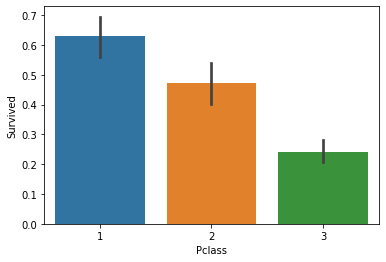

In [76]:
sns.barplot(x='Pclass', y='Survived',data=train)

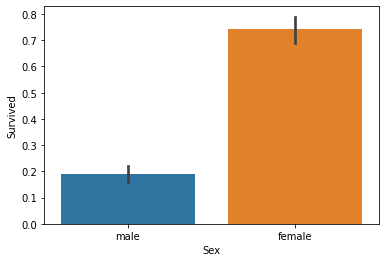

In [77]:
sns.barplot(x='Sex', y='Survived', data=train)

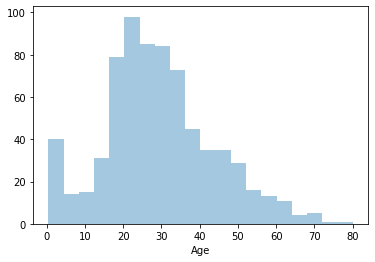

In [78]:
sns.distplot((train['Age'].dropna()), kde=False)

In [0]:
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [80]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [0]:
train['Title'] = train['Title'].replace(['Capt', 'Col', 'Don', 'Dr', 'Major','Rev','Jonkheer','Dona'],'Rare')
train['Title'] = train['Title'].replace(['Countess','Sir','Lady'],'Royal')
train['Title'] = train['Title'].replace('Mlle','Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme','Mrs')

In [0]:
test['Title'] = test['Title'].replace(['Capt','Col','Don','Dr','Major','Rev','Jonkheer','Dona'],'Rare')
test['Title'] = test['Title'].replace(['Countess','Sir','Lady'],'Royal')
test['Title'] = test['Title'].replace('Mlle','Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

In [83]:
train[['Title','Age']].groupby('Title').mean()

,Age
Title,
Master,4.574167
Miss,21.845638
Mr,32.368090
Mrs,35.788991
Rare,45.894737
Royal,43.333333


In [0]:
for i in train['Title']:
    if i=='Master':
        train['Age'] = train['Age'].fillna(4)
    elif i=='Miss':
        train['Age'] = train['Age'].fillna(22)
    elif i=='Mr':
        train['Age'] = train['Age'].fillna(32)
    elif i=='Mrs':
        train['Age'] = train['Age'].fillna(36)
    elif i=='Rare':
        train['Age'] = train['Age'].fillna(46)
    else:
        train['Age'] = train['Age'].fillna(41)

In [85]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [86]:
for i in test['Title']:
    if i=='Master':
        test['Age'] = test['Age'].fillna(7)
    elif i=='Miss':
        test['Age'] = test['Age'].fillna(21)
    elif i=='Mr':
        test['Age'] = test['Age'].fillna(32)
    elif i=='Mrs':
        test['Age'] = test['Age'].fillna(38)
    elif i=='Rare':
        test['Age'] = test['Age'].fillna(43)
    else:
        test['Age'] = test['Age'].fillna(41)
        
        
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [87]:
test[['Pclass','Fare']].groupby('Pclass').mean()

,Fare
Pclass,
1,94.280297
2,22.202104
3,12.459678


In [0]:
test['Fare'] = test['Fare'].fillna(12)

In [89]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

In [90]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [0]:
train['N_cabin'] = (train['Cabin'].notnull().astype('int'))
test['N_cabin'] = (test['Cabin'].notnull().astype('int'))

In [92]:
test['N_cabin'].shape

(418,)

In [93]:
train['N_cabin'].shape

(891,)

In [0]:
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

In [0]:
train['Embarked'] = train['Embarked'].fillna('S')

In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['Embarked'] = le.fit_transform(train['Embarked'])
test['Embarked'] = le.fit_transform(test['Embarked'])

In [0]:
sex_mapping = {'male':0, 'female':1}

train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

In [98]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,N_cabin
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2,Mr,0


In [99]:
train[['Title','Survived']].groupby(['Title'], as_index=False).mean().sort_values('Survived')

,Title,Survived
2,Mr,0.156673
4,Rare,0.250000
0,Master,0.575000
1,Miss,0.702703
3,Mrs,0.793651
5,Royal,1.000000


In [100]:
train[['Title','Survived']].groupby(['Title'], as_index=False).mean().sort_values('Survived')

,Title,Survived
2,Mr,0.156673
4,Rare,0.250000
0,Master,0.575000
1,Miss,0.702703
3,Mrs,0.793651
5,Royal,1.000000


In [0]:
Title_mapping = {'Mr': 1,'Rare': 2,'Master': 3,'Miss': 4,'Mrs': 5,'Royal': 6}

train['Title'] = train['Title'].map(Title_mapping)
test['Title'] = test['Title'].map(Title_mapping)

In [102]:
train.loc[train['Title']]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,N_cabin
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0,5,1
5,6,0,3,"Moran, Mr. James",0,32.0,0,0,330877,8.4583,1,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2,1,0
5,6,0,3,"Moran, Mr. James",0,32.0,0,0,330877,8.4583,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2,4,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0,5,1


In [0]:
train_name = train['Name']
for i in train['Name']:
    train['Name'] = train['Name'].replace(i, len(i))

In [104]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,N_cabin
0,1,0,3,23,0,22.0,1,0,A/5 21171,7.2500,2,1,0
1,2,1,1,51,1,38.0,1,0,PC 17599,71.2833,0,5,1
2,3,1,3,22,1,26.0,0,0,STON/O2. 3101282,7.9250,2,4,0
3,4,1,1,44,1,35.0,1,0,113803,53.1000,2,5,1
4,5,0,3,24,0,35.0,0,0,373450,8.0500,2,1,0


In [0]:
test_name = test['Name']
for i in test['Name']:
    test['Name'] = test['Name'].replace(i, len(i))

In [106]:
test['Name'].describe()

count    418.000000
mean      27.483254
std        9.971228
min       13.000000
25%       20.000000
50%       25.000000
75%       30.750000
max       63.000000
Name: Name, dtype: float64

In [0]:
bins = [0,25,40, np.inf]
name_labels = ['s_name', 'm_name', 'l_name']
train['Name_len'] = pd.cut(train['Name'], bins, labels=name_labels)
test['Name_len'] = pd.cut(test['Name'], bins, labels=name_labels)

In [108]:
train['Name_len'].value_counts()

s_name    458
m_name    343
l_name     90
Name: Name_len, dtype: int64

In [109]:
train[['Name_len', 'Survived']].groupby('Name_len').mean()

,Survived
Name_len,
s_name,0.275109
m_name,0.419825
l_name,0.800000


In [0]:
name_mapping = {'s_name':1, 'm_name':2, 'l_name':3}

train['Name_len'] = train['Name_len'].map(name_mapping)
test['Name_len'] = test['Name_len'].map(name_mapping)

In [111]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,N_cabin,Name_len
0,1,0,3,23,0,22.0,1,0,A/5 21171,7.2500,2,1,0,1
1,2,1,1,51,1,38.0,1,0,PC 17599,71.2833,0,5,1,3
2,3,1,3,22,1,26.0,0,0,STON/O2. 3101282,7.9250,2,4,0,1
3,4,1,1,44,1,35.0,1,0,113803,53.1000,2,5,1,3
4,5,0,3,24,0,35.0,0,0,373450,8.0500,2,1,0,1


In [0]:
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)

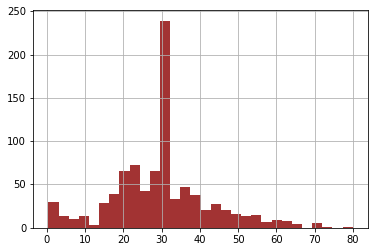

In [113]:
train['Age'].hist(bins=30,color='darkred',alpha=0.8)

In [0]:
bins = [0,5,12,18,24,35,60,np.inf]
Age_label = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']

train['AgeGroup'] = pd.cut(train['Age'], bins, labels = Age_label)
test['AgeGroup'] = pd.cut(test['Age'], bins, labels = Age_label)

In [115]:
train[['AgeGroup', 'Survived']].groupby('AgeGroup').mean()

,Survived
AgeGroup,
Baby,0.704545
Child,0.360000
Teenager,0.428571
Student,0.347826
Young Adult,0.355164
Adult,0.400000
Senior,0.227273


In [0]:
age_mapping = {'Baby':1, 'Child':2, 'Teenager':3, 'Student':4, 
               'Young Adult':5,'Adult':6, 'Senior':7}


train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)


In [117]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,N_cabin,Name_len,AgeGroup
0,0,3,0,22.0,1,0,A/5 21171,7.2500,2,1,0,1,4
1,1,1,1,38.0,1,0,PC 17599,71.2833,0,5,1,3,6
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,2,4,0,1,5
3,1,1,1,35.0,1,0,113803,53.1000,2,5,1,3,5
4,0,3,0,35.0,0,0,373450,8.0500,2,1,0,1,5


In [0]:
train['FareBand'] = pd.qcut(train['Fare'], 8, labels = [1,2,3,4,5,6,7,8])
test['FareBand'] = pd.qcut(train['Fare'], 8, labels= [1,2,3,4,5,6,7,8])

In [0]:
#scaling data in fare and age columns

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

train['Fare'] = mms.fit_transform(train['Fare'].values.reshape(-1, 1))
test['Fare'] = mms.fit_transform(test['Fare'].values.reshape(-1, 1))

train['Age'] = mms.fit_transform(train['Age'].values.reshape(-1,1))
test['Age'] = mms.fit_transform(test['Age'].values.reshape(-1,1))

In [120]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,N_cabin,Name_len,AgeGroup,FareBand
0,0,3,0,0.271174,1,0,A/5 21171,0.014151,2,1,0,1,4,1
1,1,1,1,0.472229,1,0,PC 17599,0.139136,0,5,1,3,6,8
2,1,3,1,0.321438,0,0,STON/O2. 3101282,0.015469,2,4,0,1,5,3
3,1,1,1,0.434531,1,0,113803,0.103644,2,5,1,3,5,7
4,0,3,0,0.434531,0,0,373450,0.015713,2,1,0,1,5,3


In [0]:
train['FamilySize'] = train['SibSp']+train['Parch']+1
test['FamilySize'] = train['SibSp']+train['Parch']+1

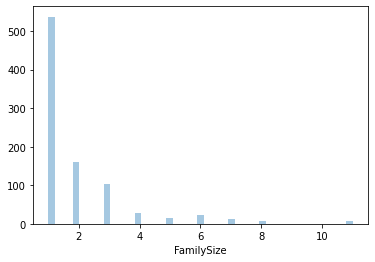

In [122]:
sns.distplot(train['FamilySize'], kde=False)

In [0]:
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

In [124]:
combine = [train, test]

for dataset in combine:
    dataset['Single'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'Single'] = 1
    
train[['Single', 'Survived']].groupby(['Single'], as_index=False).mean()

,Single,Survived
0,0,0.505650
1,1,0.303538


In [0]:
train = train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test = test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)

In [126]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,N_cabin,Name_len,AgeGroup,FareBand,Single
0,892,3,0,0.452723,0.015282,1,1,0,1,5,1,0
1,893,3,1,0.617566,0.013663,2,5,0,2,6,8,0
2,894,2,0,0.815377,0.018909,1,1,0,1,7,3,1
3,895,3,0,0.353818,0.016908,2,1,0,1,5,7,0
4,896,3,1,0.287881,0.023984,2,5,0,3,4,3,1


In [127]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,N_cabin,Name_len,AgeGroup,FareBand,Single
0,0,3,0,0.271174,0.014151,2,1,0,1,4,1,0
1,1,1,1,0.472229,0.139136,0,5,1,3,6,8,0
2,1,3,1,0.321438,0.015469,2,4,0,1,5,3,1
3,1,1,1,0.434531,0.103644,2,5,1,3,5,7,0
4,0,3,0,0.434531,0.015713,2,1,0,1,5,3,1


In [128]:
X_train = train.drop('Survived', axis=1)
Y_train = train['Survived']
X_test = test.drop('PassengerId', axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 11), (891,), (418, 11))

In [129]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_logreg = round(logreg.score(X_train, Y_train) * 100, 2)
acc_logreg

82.27

In [130]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, Y_train)
y_pred = gbc.predict(X_test)
acc_gbc = round(gbc.score(X_train, Y_train) * 100, 2)
acc_gbc

90.35

In [131]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, Y_train)
y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

82.38

In [133]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train)* 100, 2)
acc_linear_svc


81.59

In [134]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
y_pred = dt.predict(X_test)
acc_dt = round(dt.score(X_train, Y_train)* 100, 2)
acc_dt

99.1

In [135]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)
acc_rfc = round(rfc.score(X_train, Y_train)* 100, 2)
acc_rfc

99.1

In [136]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train)* 100, 2)
acc_perceptron

65.32

In [137]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train)* 100, 2)
acc_knn

86.87

In [138]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train)* 100, 2)
acc_sgd

77.55

In [139]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, Y_train)
y_pred = gnb.predict(X_test)
acc_gnb = round(gnb.score(X_train, Y_train)* 100, 2)
acc_gnb

77.67

In [140]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Gradient Boosting Classifer',
              'Support Vector Machine','Linear SVC','Decision Tree',
              'Random Forest','Perceptron','KNN',
              'Stochastic Gradient Descent',
              'Naive Bayes'],
    'Accuracy' : [acc_logreg,acc_gbc,acc_svc,
                  acc_linear_svc,acc_dt,acc_rfc,
                  acc_perceptron,acc_knn,acc_sgd,
                  acc_gnb]
})

models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
4,Decision Tree,99.10
5,Random Forest,99.10
1,Gradient Boosting Classifer,90.35
7,KNN,86.87
2,Support Vector Machine,82.38
0,Logistic Regression,82.27
3,Linear SVC,81.59
9,Naive Bayes,77.67
8,Stochastic Gradient Descent,77.55
6,Perceptron,65.32


In [0]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)